In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from ATZE.Scenario_Analysis.create_time_evolution_adapted import create_time_normalization_xr, convert_xr_to_nc, plot_time_norm
lee_p = r"C:\Users\atzeh\OneDrive\Documenten\TU\MASTER\Thesis\Lee_data.xlsx"


In [2]:
emissions = [
    [1990, 549.6,	0.65,	0.0050,	0.1983,	203.4,	1.68E+10],
    [1991, 531.5,	0.63,	0.0048,	0.1918,	196.7,	1.66E+10],
    [1992, 532.8,	0.63,	0.0048,	0.1922,	197.2,	1.83E+10],
    [1993, 535.7,	0.64,	0.0048,	0.1932,	198.2,	2.00E+10],
    [1994, 561.2,	0.67,	0.0051,	0.2025,	207.7,	2.13E+10],
    [1995, 574.9,	0.70,	0.0052,	0.2074,	212.7,	2.27E+10],
    [1996, 600.9,	0.73,	0.0054,	0.2168,	222.4,	2.40E+10],
    [1997, 619.2,	0.76,	0.0056,	0.2234,	229.2,	2.52E+10],
    [1998, 631.4,	0.78,	0.0057,	0.2278,	233.7,	2.62E+10],
    [1999, 651.8,	0.82,	0.0059,	0.2351,	241.2,	2.77E+10],
    [2000, 685.5,	0.87,	0.0062,	0.2473,	253.7,	3.03E+10],
    [2001, 659.4,	0.84,	0.0059,	0.2379,	244.0,	3.05E+10],
    [2002, 660.7,	0.84,	0.0060,	0.2384,	244.5,	2.97E+10],
    [2003, 660.3,	0.85,	0.0060,	0.2382,	244.4,	3.10E+10],
    [2004, 701.9,	0.91,	0.0063,	0.2532,	259.7,	3.51E+10],
    [2005, 736.4,	0.96,	0.0066,	0.2656,	272.5,	3.71E+10],
    [2006, 744.9,	0.98,	0.0067,	0.2687,	275.7,	3.87E+10],
    [2007, 766.6,	1.02,	0.0069,	0.2766,	283.7,	4.07E+10],
    [2008, 763.0,	1.03,	0.0069,	0.2753,	282.4,	4.17E+10],
    [2009, 723.6,	0.99,	0.0065,	0.2610,	267.8,	4.06E+10],
    [2010, 760.1,	1.05,	0.0069,	0.2742,	281.3,	4.47E+10],
    [2011, 782.7,	1.08,	0.0071,	0.2824,	289.6,	4.71E+10],
    [2012, 791.1,	1.10,	0.0071,	0.2854,	292.8,	4.83E+10],
    [2013, 813.6,	1.13,	0.0073,	0.2935,	301.1,	4.98E+10],
    [2014, 839.2,	1.16,	0.0076,	0.3028,	310.6,	5.18E+10],
    [2015, 885.1,	1.23,	0.0080,	0.3193,	327.5,	5.44E+10],
    [2016, 927.9,	1.29,	0.0084,	0.3347,	343.4,	5.74E+10],
    [2017, 982.6,	1.36,	0.0089,	0.3545,	363.6,	6.01E+10],
    [2018, 1033.7,	1.43,	0.0093,	0.3729,	382.6,	6.13E+10]]
columns = [
    "Year", "CO2", "NOx", "BC",
    "SO2", "H2O", "cont_dist"
]
# Create DataFrame
df = pd.DataFrame(emissions, columns=columns)

# Set 'Year' as index
# df.set_index("Year", inplace=True)

# Display the DataFrame
print(df)


    Year     CO2   NOx      BC     SO2    H2O     cont_dist
0   1990   549.6  0.65  0.0050  0.1983  203.4  1.680000e+10
1   1991   531.5  0.63  0.0048  0.1918  196.7  1.660000e+10
2   1992   532.8  0.63  0.0048  0.1922  197.2  1.830000e+10
3   1993   535.7  0.64  0.0048  0.1932  198.2  2.000000e+10
4   1994   561.2  0.67  0.0051  0.2025  207.7  2.130000e+10
5   1995   574.9  0.70  0.0052  0.2074  212.7  2.270000e+10
6   1996   600.9  0.73  0.0054  0.2168  222.4  2.400000e+10
7   1997   619.2  0.76  0.0056  0.2234  229.2  2.520000e+10
8   1998   631.4  0.78  0.0057  0.2278  233.7  2.620000e+10
9   1999   651.8  0.82  0.0059  0.2351  241.2  2.770000e+10
10  2000   685.5  0.87  0.0062  0.2473  253.7  3.030000e+10
11  2001   659.4  0.84  0.0059  0.2379  244.0  3.050000e+10
12  2002   660.7  0.84  0.0060  0.2384  244.5  2.970000e+10
13  2003   660.3  0.85  0.0060  0.2382  244.4  3.100000e+10
14  2004   701.9  0.91  0.0063  0.2532  259.7  3.510000e+10
15  2005   736.4  0.96  0.0066  0.2656  

In [3]:
emis = [  
    [1990, 173.9,	549.6,	14371,	1.17,	16754	,0.95,	12.90,	0.03,	1.2,	1231],
    [1991, 168.2,	531.5,	14262,	1.17,	16627	,0.95,	12.90,	0.03,	1.2,	1231],
    [1992, 168.6,	532.8,	15690,	1.17,	18291	,0.95,	12.90,	0.03,	1.2,	1231],
    [1993, 169.5,	535.7,	17118,	1.17,	19956	,0.95,	13.01,	0.03,	1.2,	1231],
    [1994, 177.6,	561.2,	18249,	1.17,	21275	,0.95,	13.12,	0.03,	1.2,	1231],
    [1995, 181.9,	574.9,	19470,	1.17,	22698	,0.95,	13.23,	0.03,	1.2,	1231],
    [1996, 190.2,	600.9,	20601,	1.17,	24016	,0.95,	13.34,	0.03,	1.2,	1231],
    [1997, 195.9,	619.2,	21630,	1.17,	25216	,0.95,	13.46,	0.03,	1.2,	1231],
    [1998, 199.8,	631.4,	22438,	1.17,	26158	,0.95,	13.57,	0.03,	1.2,	1231],
    [1999, 206.3,	651.8,	23742,	1.17,	27678	,0.95,	13.68,	0.03,	1.2,	1231],
    [2000, 216.9,	685.5,	25982,	1.17,	30289	,0.95,	13.80,	0.03,	1.2,	1231],
    [2001, 208.7,	659.4,	26157,	1.17,	30494	,0.95,	13.88,	0.03,	1.2,	1231],
    [2002, 209.1,	660.7,	25507,	1.17,	29735	,0.95,	13.96,	0.03,	1.2,	1231],
    [2003, 209.0,	660.3,	26560,	1.17,	30963	,0.95,	14.04,	0.03,	1.2,	1231],
    [2004, 222.1,	701.9,	30122,	1.17,	35117	,0.95,	14.12,	0.03,	1.2,	1231],
    [2005, 233.0,	736.4,	31857,	1.17,	37139	,0.95,	14.20,	0.03,	1.2,	1231],
    [2006, 235.7,	744.9,	33179,	1.17,	38680	,0.95,	14.38,	0.03,	1.2,	1231],
    [2007, 242.6,	766.6,	34935,	1.17,	40727	,0.95,	14.57,	0.03,	1.2,	1231],
    [2008, 241.5,	763.0,	35769,	1.17,	41699	,0.95,	14.76,	0.03,	1.2,	1231],
    [2009, 229.0,	723.6,	34868,	1.17,	40648	,0.95,	14.95,	0.03,	1.2,	1231],
    [2010, 240.5,	760.1,	38366,	1.17,	44727	,0.95,	15.14,	0.03,	1.2,	1231],
    [2011, 247.7,	782.7,	40441,	1.17,	47145	,0.95,	15.14,	0.03,	1.2,	1231],
    [2012, 250.4,	791.1,	41454,	1.17,	48326	,0.95,	15.14,	0.03,	1.2,	1231],
    [2013, 257.5,	813.6,	42740,	1.17,	49826	,0.95,	15.14,	0.03,	1.2,	1231],
    [2014, 265.6,	839.2,	44460,	1.17,	51832	,0.95,	15.14,	0.03,	1.2,	1231],
    [2015, 280.1,	885.1,	46704,	1.17,	54447	,0.95,	15.14,	0.03,	1.2,	1231],
    [2016, 293.6,	927.9,	49204,	1.17,	57361	,0.95,	15.14,	0.03,	1.2,	1231],
    [2017, 311.0,	982.6,	51588,	1.17,	60141	,0.95,	15.14,	0.03,	1.2,	1231],
    [2018, 327.1	,1033.7,	52611,	1.17,	61333,	0.95,	15.14,	0.03,	1.2,	1231]]

columns = [
    "Year", "Fuel", "CO2", "dist", "dist_fac", "dist_scaled", "civil_frac", "EI_NOx", "EI_BC",
    "EI_SO2", "EI_H2O"
]
# Create DataFrame
emis_df = pd.DataFrame(emis, columns=columns)

# Set 'Year' as index
# emis_df.set_index("Year", inplace=True)
emis_df['Fuel'] = emis_df['Fuel']* emis_df['civil_frac']

# Display the DataFrame
print(emis_df)


    Year     Fuel     CO2   dist  dist_fac  dist_scaled  civil_frac  EI_NOx  \
0   1990  165.205   549.6  14371      1.17        16754        0.95   12.90   
1   1991  159.790   531.5  14262      1.17        16627        0.95   12.90   
2   1992  160.170   532.8  15690      1.17        18291        0.95   12.90   
3   1993  161.025   535.7  17118      1.17        19956        0.95   13.01   
4   1994  168.720   561.2  18249      1.17        21275        0.95   13.12   
5   1995  172.805   574.9  19470      1.17        22698        0.95   13.23   
6   1996  180.690   600.9  20601      1.17        24016        0.95   13.34   
7   1997  186.105   619.2  21630      1.17        25216        0.95   13.46   
8   1998  189.810   631.4  22438      1.17        26158        0.95   13.57   
9   1999  195.985   651.8  23742      1.17        27678        0.95   13.68   
10  2000  206.055   685.5  25982      1.17        30289        0.95   13.80   
11  2001  198.265   659.4  26157      1.17        30

In [4]:
ERF = [    
    [2000, 21.77,	29.81,	-11.81,	-5.91,	-1.77,	12.17,	0.62,	-4.92,	1.31,	28.35],
    [2001, 22.41,	28.84,	-11.49,	-5.74,	-1.72,	11.69,	0.60,	-4.74,	1.26,	28.54],
    [2002, 23.02,	29.07,	-11.64,	-5.82,	-1.75,	11.69,	0.60,	-4.75,	1.27,	27.83],
    [2003, 23.61,	29.21,	-11.76,	-5.88,	-1.76,	11.66,	0.60,	-4.74,	1.27,	28.98],
    [2004, 24.27,	31.23,	-12.64,	-6.32,	-1.90,	12.36,	0.64,	-5.04,	1.35,	32.87],
    [2005, 24.97,	32.95,	-13.41,	-6.71,	-2.01,	12.92,	0.67,	-5.29,	1.41,	34.76],
    [2006, 25.66,	33.77,	-13.81,	-6.90,	-2.07,	13.14,	0.68,	-5.35,	1.43,	36.20],
    [2007, 26.39,	35.20,	-14.46,	-7.23,	-2.17,	13.58,	0.70,	-5.51,	1.47,	38.12],
    [2008, 27.07,	35.48,	-14.64,	-7.32,	-2.20,	13.59,	0.69,	-5.48,	1.46,	39.03],
    [2009, 27.69,	34.08,	-14.13,	-7.06,	-2.12,	12.94,	0.66,	-5.20,	1.39,	38.04],
    [2010, 28.33,	36.27,	-15.10,	-7.55,	-2.26,	13.66,	0.69,	-5.46,	1.46,	41.86],
    [2011, 29.01,	37.34,	-15.81,	-7.90,	-2.37,	13.62,	0.71,	-5.62,	1.50,	44.13],
    [2012, 29.68,	37.75,	-16.04,	-8.02,	-2.41,	13.66,	0.72,	-5.68,	1.52,	45.23],
    [2013, 30.36,	38.82,	-16.56,	-8.28,	-2.48,	13.95,	0.74,	-5.84,	1.56,	46.63],
    [2014, 31.08,	40.04,	-17.15,	-8.57,	-2.57,	14.27,	0.76,	-6.03,	1.61,	48.51],
    [2015, 31.85,	42.23,	-18.15,	-9.08,	-2.72,	14.93,	0.80,	-6.36,	1.70,	50.96],
    [2016, 32.62,	44.27,	-18.98,	-9.49,	-2.85,	15.74,	0.84,	-6.66,	1.78,	53.69],
    [2017, 33.46	,46.88	,-20.10	,-10.05,	-3.02,	16.67,	0.89,	-7.06,	1.88,	56.29],
    [2018, 34.33	,49.32	,-21.15	,-10.57,	-3.17,	17.54,	0.94,	-7.42,	1.98,	57.40]]

columns = [
    "Year", "CO2", "O3_short", "CH4",
    "O3_long", "SWV", "net_NOx", "BC", "SO4", "H2O", "cont_dist"
]

# Create DataFrame
ERF_df = pd.DataFrame(ERF, columns=columns)

# Set 'Year' as index
# ERF_df.set_index("Year", inplace=True)

# Display the DataFrame
print(ERF_df)

    Year    CO2  O3_short    CH4  O3_long   SWV  net_NOx    BC   SO4   H2O  \
0   2000  21.77     29.81 -11.81    -5.91 -1.77    12.17  0.62 -4.92  1.31   
1   2001  22.41     28.84 -11.49    -5.74 -1.72    11.69  0.60 -4.74  1.26   
2   2002  23.02     29.07 -11.64    -5.82 -1.75    11.69  0.60 -4.75  1.27   
3   2003  23.61     29.21 -11.76    -5.88 -1.76    11.66  0.60 -4.74  1.27   
4   2004  24.27     31.23 -12.64    -6.32 -1.90    12.36  0.64 -5.04  1.35   
5   2005  24.97     32.95 -13.41    -6.71 -2.01    12.92  0.67 -5.29  1.41   
6   2006  25.66     33.77 -13.81    -6.90 -2.07    13.14  0.68 -5.35  1.43   
7   2007  26.39     35.20 -14.46    -7.23 -2.17    13.58  0.70 -5.51  1.47   
8   2008  27.07     35.48 -14.64    -7.32 -2.20    13.59  0.69 -5.48  1.46   
9   2009  27.69     34.08 -14.13    -7.06 -2.12    12.94  0.66 -5.20  1.39   
10  2010  28.33     36.27 -15.10    -7.55 -2.26    13.66  0.69 -5.46  1.46   
11  2011  29.01     37.34 -15.81    -7.90 -2.37    13.62  0.71 -

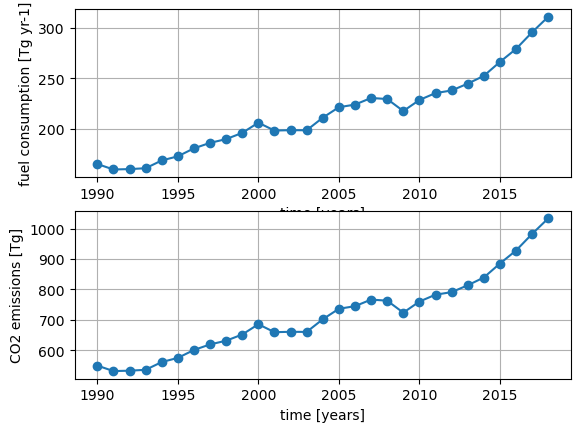

In [5]:
NORM_TIME = emis_df["Year"].values

FUEL_ARR = emis_df["Fuel"].values
EI_CO2_ARR = emis_df["CO2"]/ FUEL_ARR
EI_H2O_ARR = emis_df['EI_H2O']/1000 #kg/kg
EI_NOx_ARR = emis_df["EI_NOx"]/1000 #kgNOx/kgfuel
DIS_PER_FUEL_ARR = emis_df["dist"]*1e6 # km

norm_ds = create_time_normalization_xr(
    time_arr=NORM_TIME,
    fuel_arr=FUEL_ARR,
    ei_co2_arr=EI_CO2_ARR,
    ei_h2o_arr=EI_H2O_ARR,
    ei_nox_arr=EI_NOx_ARR,
    dis_per_fuel_arr=DIS_PER_FUEL_ARR,
)
convert_xr_to_nc(
    norm_ds, "Lee"+ "_evo", "../VandV/evolution/"
)
plot_time_norm(norm_ds)

In [6]:
print(173.9*12.9/1000, "Tg NOx")
print(173.9*12.9/1000/3.285, "Tg N")


2.24331 Tg NOx
0.6828949771689498 Tg N


read_config ln. 254 in check_against_template INFO: Get default value for: responses CO2 rf method 
read_config ln. 254 in check_against_template INFO: Get default value for: responses cont method 
read_config ln. 520 in check_metrics_time ERROR: Metrics time settings with t_0 = 2020 and H = 20 are outside defined time range.
read_config ln. 185 in check_config ERROR: Configuration is not valid.
read_config ln. 380 in create_output_dir INFO: Overwrite existing output directory results_Lee/
read_netcdf ln. 173 in open_inventories INFO: Emission inventories openend, attribute sections and time constraints checked successfully.
read_netcdf ln. 220 in split_inventory_by_aircraft WARNING: No ac coordinate found in emission inventory for year 2000. Reverting to 'DEFAULT' aircraft from config file.
calc_response ln. 131 in calc_resp_all WARNING: O3 response surface is not validated!
main ln. 175 in run WARNING: CH4 response surface is not validated!
calc_response ln. 172 in calc_resp_sub WARN

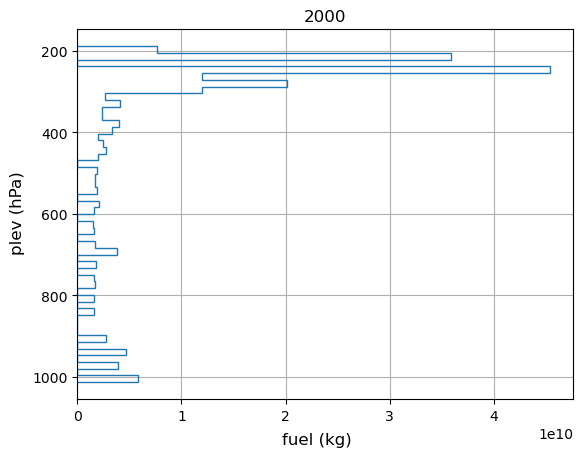

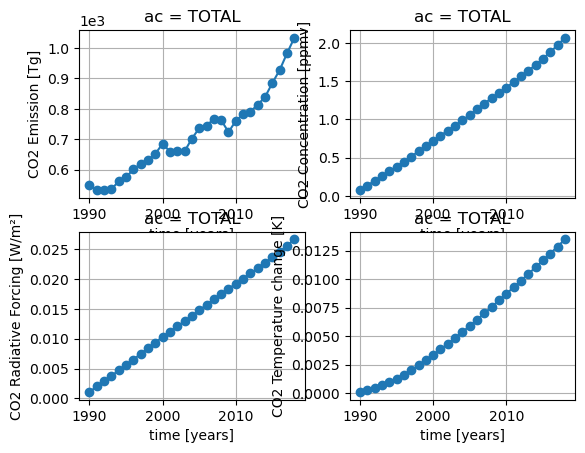

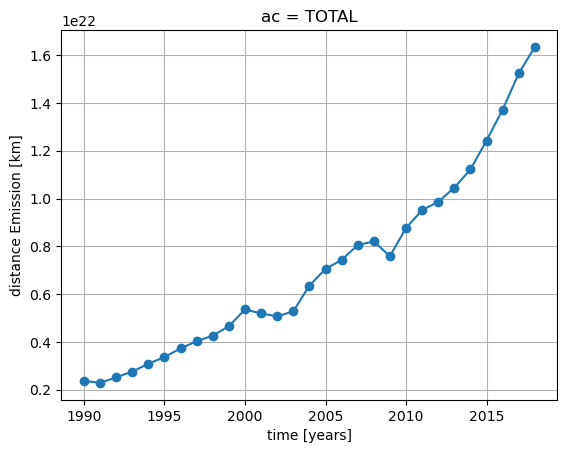

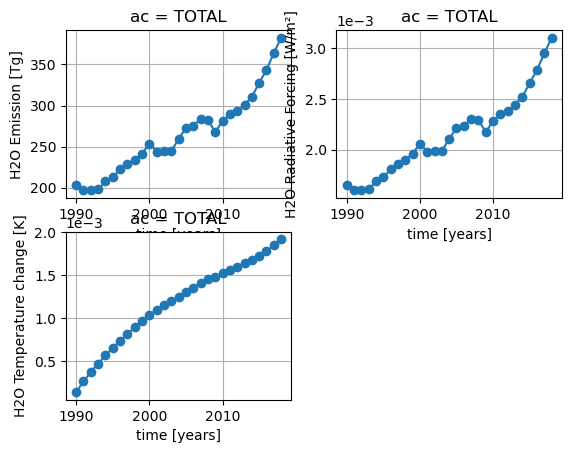

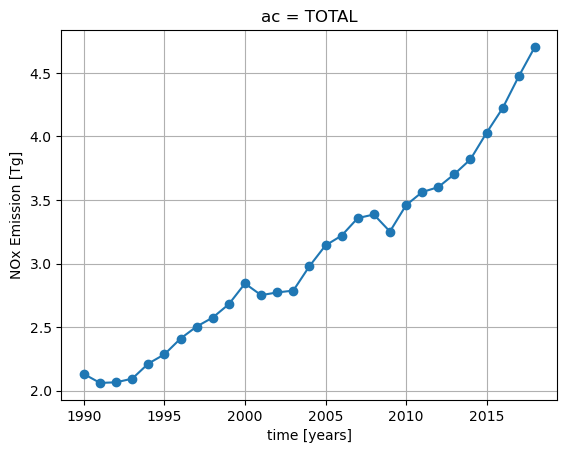

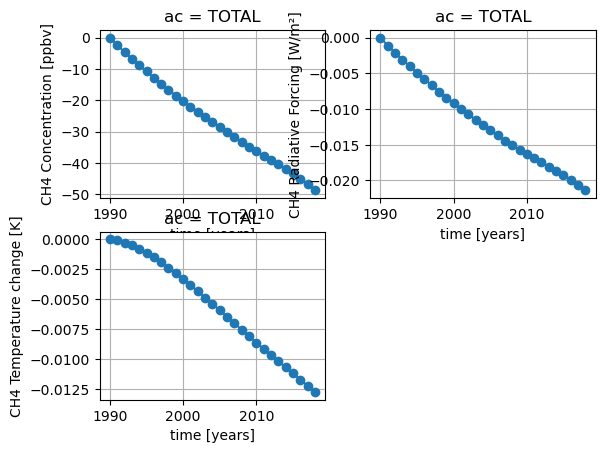

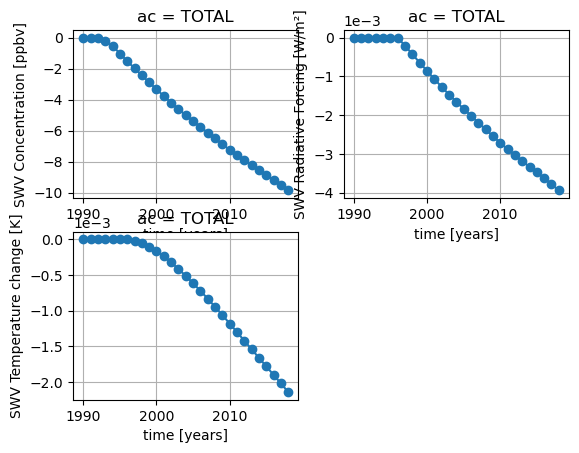

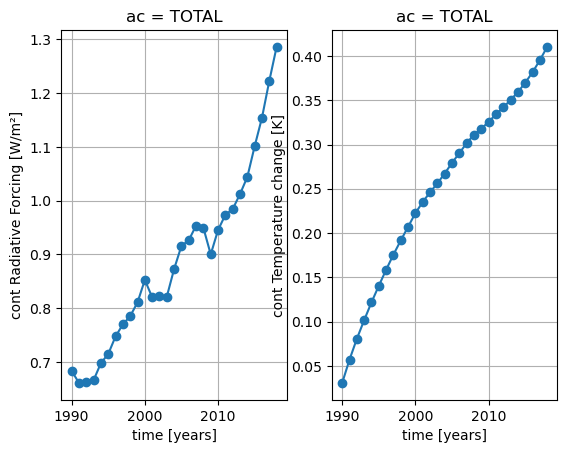

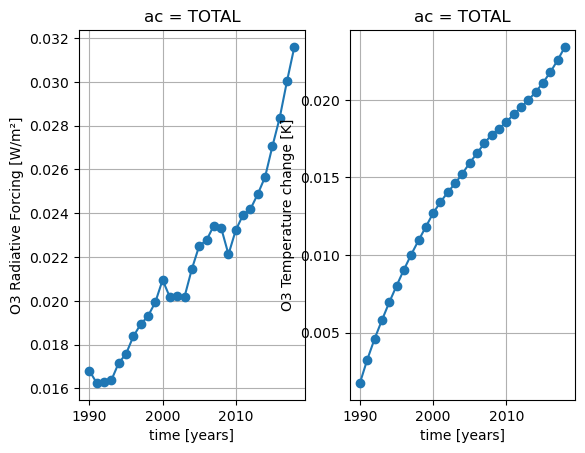

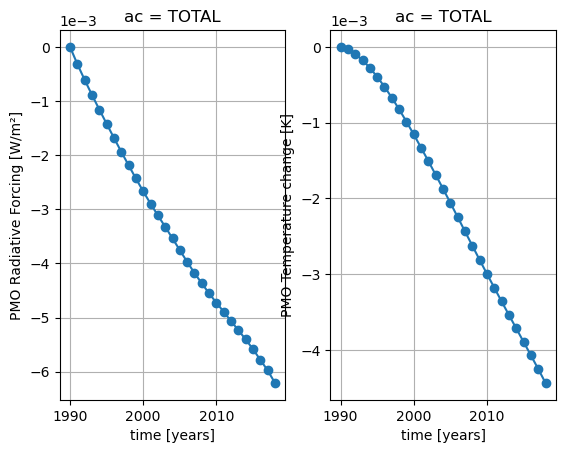

In [7]:

# if you have not added the oac folder to your PATH, then you also need to
# import sys and append to PATH using sys.path.append(`.../oac`)
import os
import openairclim as oac
import sys
import numpy as np

sys.path.append("../../openairclim")


# change directory to match current file
# os.chdir(os.path.dirname(os.path.abspath(__file__)))

oac.run(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\VandV\Lee.toml")


In [8]:
"""Write an additional DEPA file with the right year"""
# import xarray as xr
# ds = xr.load_dataset(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2020_DEPA.nc")
# display(ds)
# ds.attrs['Inventory_Year'] =np.int32(2000)
# display(ds)
# ds.to_netcdf(r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2000_DEPA.nc")

'Write an additional DEPA file with the right year'

In [9]:
"""Postprocessing"""
import xarray as xr
data = xr.load_dataset(r"results_Lee/Lee.nc")
data

<xarray.Dataset> Size: 10kB
Dimensions:        (ac: 2, time: 29)
Coordinates:
  * time           (time) int64 232B 1990 1991 1992 1993 ... 2015 2016 2017 2018
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/21)
    emis_CO2       (ac, time) float64 464B 549.6 531.5 532.8 ... 982.6 1.034e+03
    emis_distance  (ac, time) float64 464B 2.374e+21 2.279e+21 ... 1.635e+22
    emis_H2O       (ac, time) float64 464B 203.4 196.7 197.2 ... 363.7 382.5
    emis_NOx       (ac, time) float64 464B 2.131 2.061 2.066 ... 4.473 4.705
    conc_CH4       (ac, time) float64 464B 0.0 -2.374 -4.583 ... -46.78 -48.78
    conc_CO2       (ac, time) float64 464B 0.07052 0.1349 0.197 ... 1.97 2.066
    ...             ...
    dT_CO2         (ac, time) float64 464B 7.947e-05 0.0002222 ... 0.0135
    dT_cont        (ac, time) float64 464B 0.03072 0.05703 ... 0.3952 0.4102
    dT_H2O         (ac, time) float64 464B 0.0001433 0.000266 ... 0.001914
    dT_O3          (ac, time) float64 464B 0.001753 0.003254 ... 0.02255 0.02341
    dT_PMO         (ac, time) float64 464B 0.0 -3.302e-05 ... -0.004436
    dT_SWV         (ac, time) float64 464B 0.0 0.0 0.0 ... -0.002023 -0.002144
Attributes:
    title:        Lee
    created:      2025-11-12 14:04:57
    user:         atzeh
    oac version:  0.11.1

In [10]:
species = ["H2O", "CO2", "CH4", "SWV"]
ERF_df

,Year,CO2,O3_short,CH4,O3_long,SWV,net_NOx,BC,SO4,H2O,cont_dist
0,2000,21.77,29.81,-11.81,-5.91,-1.77,12.17,0.62,-4.92,1.31,28.35
1,2001,22.41,28.84,-11.49,-5.74,-1.72,11.69,0.60,-4.74,1.26,28.54
2,2002,23.02,29.07,-11.64,-5.82,-1.75,11.69,0.60,-4.75,1.27,27.83
3,2003,23.61,29.21,-11.76,-5.88,-1.76,11.66,0.60,-4.74,1.27,28.98
4,2004,24.27,31.23,-12.64,-6.32,-1.90,12.36,0.64,-5.04,1.35,32.87
5,2005,24.97,32.95,-13.41,-6.71,-2.01,12.92,0.67,-5.29,1.41,34.76
6,2006,25.66,33.77,-13.81,-6.90,-2.07,13.14,0.68,-5.35,1.43,36.20
7,2007,26.39,35.20,-14.46,-7.23,-2.17,13.58,0.70,-5.51,1.47,38.12
8,2008,27.07,35.48,-14.64,-7.32,-2.20,13.59,0.69,-5.48,1.46,39.03
9,2009,27.69,34.08,-14.13,-7.06,-2.12,12.94,0.66,-5.20,1.39,38.04


In [11]:
data['RF_SWV'][0].values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00020666, -0.00042651, -0.0006428 ,
       -0.0008559 , -0.00106535, -0.00126951, -0.00146626, -0.00165402,
       -0.00183513, -0.00201306, -0.0021899 , -0.00236638, -0.00254181,
       -0.00271397, -0.00288001, -0.00303781, -0.00318795, -0.00333387,
       -0.00347912, -0.00362722, -0.00378168, -0.00394595])

19
19






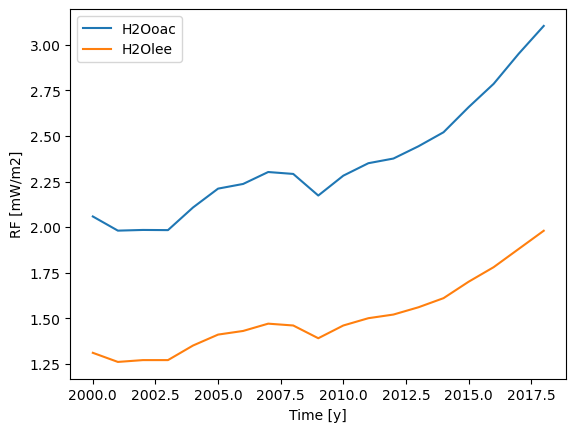

19
19






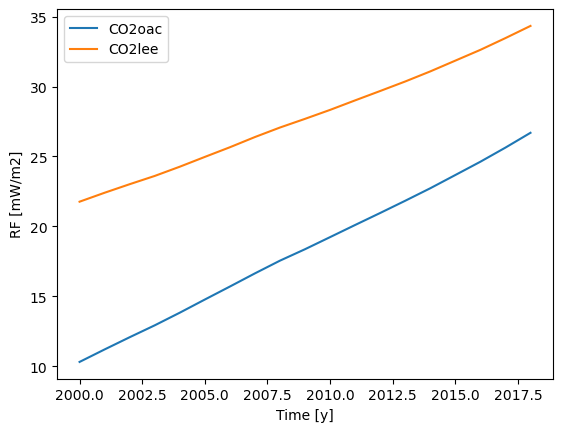

19
19






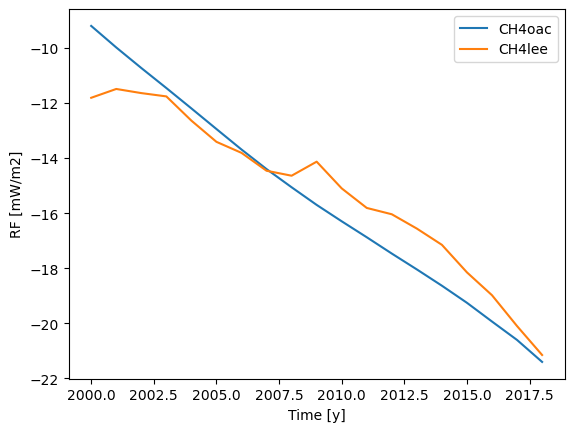

19
19






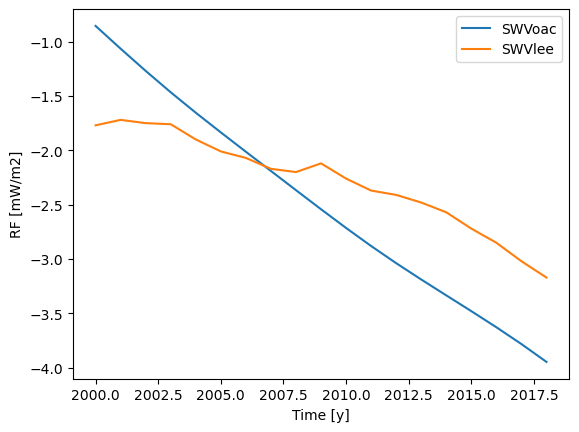

In [12]:
time = ERF_df['Year'].values
#TODO this is comparing RF with ERF
for spec in species:
    oac = data[f'RF_{spec}'][0].values[10:]*1000
    lee = ERF_df[spec].values
    print(len(oac))
    print(len(lee))
    print("\n\n\n")
    plt.plot(time, oac, label =spec +'oac')
    plt.plot(time, lee, label =spec +'lee')
    plt.xlabel('Time [y]')
    plt.ylabel('RF [mW/m2]')
    plt.legend()
    plt.show()
    


In [13]:
lee_2018 = {'SWV':-2.7, 'CO2':34.3, 'CH4':-17.9, 'H2O':2, "cont":111.4, 'O3':36, 'PMO':-9} #mW/m2
lee_2018_low = {'SWV':-5, 'CO2':34.3, 'CH4':-33.6, 'H2O':0.8, "cont":111.4, 'O3':23, 'PMO':-16.8} #mW/m2
lee_2018_high = {'SWV':-1.9, 'CO2':34.3, 'CH4':-12.5, 'H2O':3.2, "cont":111.4, 'O3':55.8, 'PMO':-6.3} #mW/m2

for spec in lee_2018.keys():
    print(spec, lee_2018[spec], data['RF_'+spec][0].values[-1]*1000)

SWV -2.7 -3.9459529241725377
CO2 34.3 26.69322660216325
CH4 -17.9 -21.401550711467166
H2O 2 3.1042113646737683
cont 111.4 1285.6887174279354
O3 36 31.597860137117877
PMO -9 -6.206449706325477


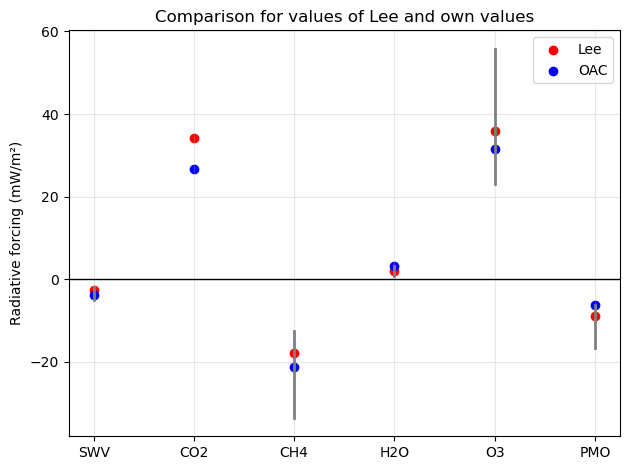

In [18]:
lee_2018_low.pop('cont') # TODO as cont has a factor 10 off estimation
species = lee_2018_low.keys()
central = [lee_2018[s] for s in species]
low = [lee_2018_low[s] for s in species]
high = [lee_2018_high[s] for s in species]
data_oac = [data['RF_'+s][0].values[-1]*1000 for s in species]

for i, s in enumerate(species):
    plt.plot([i, i], [low[i], high[i]], color='gray', lw=2)
# Plot central points
plt.scatter(range(len(species)), central, color='red', label='Lee')
plt.scatter(range(len(species)), data_oac, color='blue', label='OAC')

# Format plot
plt.xticks(range(len(species)), species)
plt.ylabel("Radiative forcing (mW/m²)")
plt.title("Comparison for values of Lee and own values")
plt.axhline(0, color='black', lw=1)
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()